# Создание моделей оттока клиентов для компании "Бета-Банк"
Из нашего банка каждый месяц понемногу стали уходить клиенты. Наши маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых. Нам необходимо спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. В нашем распоряжении  исторические данные о поведении клиентов и расторжении договоров с банком.

Предоставленные нам данные представляют собой информацию о клиентах: сколько лет, где живут, кредитный рейтинг, активность и т.д.
    
На основе этих данных нужно построить модель с предельно большим значением F1-меры. Чтобы наша работа была принята, нужно довести метрику до 0.59. F1-меру проверим на тестовой выборке. Дополнительно будем измерять AUC-ROC, сравнивая её значение с F1-мерой.
    
    
____



В данном исследовании представлен процесс создания и проверки моделей машинного обучения в целях создания рекомендательной системы. Работа произведена в соответствии с инструкциями заказчика. Каждый значительный шаг сопровождается промежуточным, либо общим выводом.
    
____
    
    
    
Часть 1. Изучение общей информации о предоставленном датасете
    
1. Импорт необходимых библиотек для работы с данными, загрузка датасета
2. Изучение данных, получение общей информации
3. Вывод

    
Часть 2. Предобработка данных

1. Удаление бесполезной информации
2. Обработка пропусков
3. Оценка мультиколлинеарности признаков
4. Кодирование признаков
5. Приведение названий столбцов к нижнему регистру
6. Масштабирование признаков
7. Вывод   
    
Часть 3. Создание моделей
1. Создание линейной модели
    1. Разделение датасета на выборки, исследование баланса классов
    2. Применение логистической регрессии
    3. Улучшение качества модели
2. Создание модели случайного леса
    1. Разделение датасета на выборки, исследование баланса классов
    2. Применение модели случайного леса
    3. Улучшение качества модели
5. Вывод
    
Часть 4. Тестирование моделей
    
1. Проведение тестов
2. Вывод
    
Часть 5. Общий вывод
1. Общий вывод о проделанной работе

 ## Часть 1. Изучение общей информации о предоставленном датасете

<a id='Импорт необходимых библиотек для работы с данными, загрузка датасета'>

### <p style="text-align:center"> Импорт необходимых библиотек для работы с данными, загрузка датасета</p>

Загружаем необходимые библиотеки для работы с данными. Разбиваем их на три смысловых блока.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import timeit
from IPython.display import display
pd.options.display.max_columns = None
import warnings
warnings.simplefilter('ignore')

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import StandardScaler 
from sklearn.utils import shuffle

Загружаем датасет, проверяем вывод.

In [4]:
raw_data = pd.read_csv('/datasets/Churn.csv')

In [5]:
raw_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


<a id='Изучение данных, получение общей информации'></a>

### <p style="text-align:center"> Изучение данных, получение общей информации</p>

Ознакомимся с информацией, посмотрим соответствуют ли типы ячеек назначению. В качестве дополнительной проверки возьмем случайные 20 строк из нашего датасета, посмотрим на странные, выбивающиеся, отсутствующие значения.

In [6]:
raw_data.sample(n=20, random_state=1)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9953,9954,15655952,Burke,550,France,Male,47,2.0,0.00,2,1,1,97057.28,0
3850,3851,15775293,Stephenson,680,France,Male,34,3.0,143292.95,1,1,0,66526.01,0
4962,4963,15665088,Gordon,531,France,Female,42,2.0,0.00,2,0,1,90537.47,0
3886,3887,15720941,Tien,710,Germany,Male,34,8.0,147833.30,2,0,1,1561.58,0
5437,5438,15733476,Gonzalez,543,Germany,Male,30,6.0,73481.05,1,1,1,176692.65,0
8517,8518,15671800,Robinson,688,France,Male,20,8.0,137624.40,2,1,1,197582.79,0
2041,2042,15709846,Yeh,840,France,Female,39,1.0,94968.97,1,1,0,84487.62,0
1989,1990,15622454,Zaitsev,695,Spain,Male,28,0.0,96020.86,1,1,1,57992.49,0
1933,1934,15815560,Bogle,666,Germany,Male,74,7.0,105102.50,1,1,1,46172.47,0
9984,9985,15696175,Echezonachukwu,602,Germany,Male,35,7.0,90602.42,2,1,1,51695.41,0


Иногда в таблицах в конце есть строка "Итого"(или т.п.), нам она не нужна, убедимся в ее отсутствии.

In [7]:
raw_data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,NaN,130142.79,1,1,0,38190.78,0


In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [9]:
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,9091.0,4.997690e+00,2.894723,0.00,2.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


Воспользуемся удобной для первичного анализа библиотекой и создадим отчет автоматически.

In [10]:
# !pip install pandas-profiling

In [11]:
# import pandas_profiling

In [12]:
# profile = pandas_profiling.ProfileReport(raw_data, title = 'Explorative raw_data report', explorative = True)
# profile

<a id='Вывод_1'></a>

### <p style="text-align:center"> Вывод</p>

##### В ходе первичного анализа данных были  сделаны следующие выводы:

___


1. Типы в общем случае соответствуют назначению, но обладают повышенной емкостью (например, имеют тип данных int64 там, где достаточно int16). Делать мы с этим конечно же ничего не будем т.к. нас еще ожидает feature scaling.


2. Имеются пропущенные значения в столбце Tenure. Разберемся с этим в следующей части работы.


3. Столбец RowNumber просто копирует индексы, избавимся от него.


4. Такие столбцы как CustomerId и Surname возможно полезны для анализа данных, однако в них нет необходимости при обучении моделей. 


5. Также приведем названия столбцов к snake case.


___

Таким образом было выполнено первичное ознакомление с предоставленной информацией, выявлены некоторые дефекты датасета. Данные нуждаются в предобработке. Разберемся с этим в следующей части.

 ## Часть 2. Предобработка данных

<a id='Удаление бесполезной информации'></a>

### <p style="text-align:center">Удаление бесполезной информации</p>

Удалим столбцы RowNumber, CustomerId и Surname, как столбцы с ненужной для обучения моделей информацией. Перед этим проверим наличие дубликатов, чтобы не удалить чего лишнего.

In [13]:
raw_data.duplicated().sum()

0

In [14]:
raw_data['CustomerId'].value_counts().sum()

10000

Смело дропаем ненужные столбцы.

In [15]:
raw_data = raw_data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

Проверяем.

In [16]:
raw_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


<a id='Обработка пропусков'></a>

### <p style="text-align:center">Обработка пропусков</p>

В данном пункте работы сначала предполагалось написать модель для заполнения пропущенных значений в столбце Tenure. Было сделано несколько попыток с максимумом в 9.9% на тесте, что лишь немного лучше дамми модели у которой 9.1%. Из инсайдов выяснили, что модели очень хорошо работают, когда пропуски в порядковых признаках заполняются просто медианой или средним, которые считаются по всему столбцу. Однако это нас не очень устраивает. Учитывая характер распределения, просто заменим пропущенные значения случайными от 1 до 10. Также был выриант с заменой пропусков на -1, нам не понравился.

In [17]:
#raw_data['Tenure'] = raw_data['Tenure'].mask(raw_data['Tenure'].isna(), np.random.randint(0, 11, size=raw_data['Tenure'].shape))

In [18]:
raw_data['Tenure'] = raw_data['Tenure'].fillna(-1)

Проверяем.

In [19]:
raw_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


<a id='Оценка мультиколлинеарности признаков'></a>

### <p style="text-align:center"> Оценка мультиколлинеарности признаков </p>

В качестве оценки мультиколлинеарности признаков найдем коффициенты корреляции этих признаков, если зависимость сильнее 0.75 попытаемся оставить только один признак из двух.

In [20]:
raw_data.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.003552,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.006315,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.003552,-0.006315,1.000000,-0.005400,0.009661,0.020132,-0.024462,0.011174,-0.012570
Balance,0.006268,0.028308,-0.005400,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.009661,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.020132,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.024462,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.011174,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.012570,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


Не похоже, что у нас присутствуют признаки с сильными линейными зависимостями, поэтому визуализировать не будем.

<a id='Кодирование признаков'></a>

### <p style="text-align:center">Кодирование признаков</p>

Признаки geography и gender необходимо закодировать, для успешного обучения моделей. Однако разные модели для успешной работы требуют разного кодирования признаков. Поэтому и мы закодируем их по разному. 

In [21]:
raw_data_ohe = pd.get_dummies(raw_data, drop_first=True)
raw_data_ohe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


In [22]:
encoder = OrdinalEncoder()
encoder.fit(raw_data) 
raw_data_ordinal = pd.DataFrame(encoder.transform(raw_data), columns=raw_data.columns) 
raw_data_ordinal.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,228.0,0.0,0.0,24.0,3.0,0.0,0.0,1.0,1.0,5068.0,1.0
1,217.0,2.0,0.0,23.0,2.0,743.0,0.0,0.0,1.0,5639.0,0.0
2,111.0,0.0,0.0,24.0,9.0,5793.0,2.0,1.0,0.0,5707.0,1.0
3,308.0,0.0,0.0,21.0,2.0,0.0,1.0,0.0,0.0,4704.0,0.0
4,459.0,2.0,0.0,25.0,3.0,3696.0,0.0,1.0,1.0,3925.0,0.0


<a id='Приведение названий столбцов к нижнему регистру'></a>

### <p style="text-align:center">Приведение названий столбцов к нижнему регистру</p>

Применим функцию для перевода названий столбцов к snake case.

In [23]:
def make_it_snake_case(data):
    new_columns = []
    for column in data.columns:
        column = re.sub(r'([a-z0-9])([A-Z])', r'\1_\2', column).lower()
        column = column.replace('__', '_')
        new_columns.append(column)
    data.columns = new_columns

In [24]:
make_it_snake_case(raw_data_ohe)
make_it_snake_case(raw_data_ordinal)

Проверяем.

In [25]:
raw_data_ohe.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_germany,geography_spain,gender_male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


In [26]:
raw_data_ordinal.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,228.0,0.0,0.0,24.0,3.0,0.0,0.0,1.0,1.0,5068.0,1.0
1,217.0,2.0,0.0,23.0,2.0,743.0,0.0,0.0,1.0,5639.0,0.0
2,111.0,0.0,0.0,24.0,9.0,5793.0,2.0,1.0,0.0,5707.0,1.0
3,308.0,0.0,0.0,21.0,2.0,0.0,1.0,0.0,0.0,4704.0,0.0
4,459.0,2.0,0.0,25.0,3.0,3696.0,0.0,1.0,1.0,3925.0,0.0


In [27]:
df_ohe = raw_data_ohe
df_ordinal = raw_data_ordinal

<a id='Вывод_2'></a>

### <p style="text-align:center"> Вывод</p>

##### В ходе предобработки данных была проделана следующая работа:

___


1. В первую очередь удалили несколько ненужных столбцов.


2. Затем заполнили пропуски в столбце Tenure, попробовав при этом различные варианты.


3. Оценили мультиколлинеарность признаков. Здесь проблем не обнаружили.


4. Произвели кодирование признаков, закодировав их отдельно для линейных моделей и деревьев/лесов.


5. После этого привели названия столбцов к snake case.


6. Заключительным пунктом данной работы стало масштабирование признаков и переименование датасетов.
___

Таким образом была выполнена предобработка, переходим к непосредственному решению задачи.

 ## Часть 3. Создание моделей

## <p style="text-align:center"> Создание линейной модели </p>

Создадим линейную модель, попробуем добиться необходимой точности.

<a id='Разделение датасета на выборки, исследование баланса классов 1'></a>

### <p style="text-align:center"> Разделение датасета на выборки, исследование баланса классов </p>

In [28]:
features_ohe = df_ohe.drop('exited', axis=1)
target_ohe = df_ohe['exited']

In [29]:
features_ohe_train, features_ohe_test, target_ohe_train, target_ohe_test = train_test_split(features_ohe, target_ohe, 
                                                                                            test_size=0.4, random_state=228)
features_ohe_test, features_ohe_valid, target_ohe_test, target_ohe_valid = train_test_split(features_ohe_test, target_ohe_test, 
                                                                                            test_size=0.5, random_state=228)

Проверим разбиение.

In [30]:
print('Признаки обучающей выборки:',features_ohe_train.shape,
      'Целевой признак обучающей выборки:', target_ohe_train.shape, 
      'Признаки валидационной выборки:',features_ohe_valid.shape,  
      'Целевой признак валидационной выборки:', target_ohe_valid.shape, 
      'Признаки тестовой выборки:', features_ohe_test.shape,
      'Целевой признак тестовой выборки:', target_ohe_test.shape)

Признаки обучающей выборки: (6000, 11) Целевой признак обучающей выборки: (6000,) Признаки валидационной выборки: (2000, 11) Целевой признак валидационной выборки: (2000,) Признаки тестовой выборки: (2000, 11) Целевой признак тестовой выборки: (2000,)


<a id='Масштабирование признаков'></a>

### <p style="text-align:center"> Масштабирование признаков </p>

Выберем числовые строки для масштабирования. Как мы знаем деревьям и лесу масштабирование не нужно, а вот регрессии это будет полезно.

In [31]:
numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']

Проведем масштабирование.

In [32]:
scaler = StandardScaler()
scaler.fit(features_ohe_train[numeric])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [33]:
features_ohe_train[numeric] = scaler.transform(features_ohe_train[numeric])
features_ohe_valid[numeric] = scaler.transform(features_ohe_valid[numeric])
features_ohe_test[numeric] = scaler.transform(features_ohe_test[numeric])

Проверяем.

In [34]:
features_ohe_train.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_germany,geography_spain,gender_male
1505,-0.462327,0.876977,-0.139743,0.892709,-0.907150,0,0,-1.132558,1,0,1
7833,-0.275702,-0.560560,0.476997,-0.166901,-0.907150,0,1,1.221454,0,1,1
1483,2.067489,-0.273052,-1.681592,0.439198,0.818016,0,1,-0.564667,0,0,1
5129,-0.648953,0.301963,-0.756482,1.403502,-0.907150,1,0,-0.915790,1,0,0
4624,-0.223861,0.685306,-1.064852,0.864894,-0.907150,1,1,1.052087,0,0,1


In [35]:
features_ohe_valid.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_germany,geography_spain,gender_male
2175,1.103256,-0.464724,1.402106,0.403722,0.818016,0,0,1.504384,1,0,0
1911,-0.576376,0.206127,1.402106,-1.227100,0.818016,1,0,-1.658912,0,0,1
5293,-0.483064,0.206127,1.710476,-1.227100,0.818016,1,1,1.141174,0,1,0
5741,0.605587,0.301963,1.402106,0.670858,-0.907150,0,1,-0.415298,0,0,1
4848,-0.161652,0.301963,-1.064852,1.122666,0.818016,0,1,1.108548,0,0,1


In [36]:
features_ohe_test.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_germany,geography_spain,gender_male
1855,1.393562,0.781142,1.402106,0.726651,-0.907150,1,1,-1.172193,0,0,0
1741,0.999575,-1.327246,-0.139743,-1.227100,0.818016,0,1,-1.028636,0,0,0
5910,-1.758340,0.014455,0.476997,-1.227100,-0.907150,1,1,-1.331995,0,0,0
5294,-1.468033,-0.656395,1.402106,1.505227,-0.907150,1,1,-1.384960,1,0,1
2118,-1.976070,-1.135574,0.785366,-1.227100,0.818016,1,0,0.965152,0,0,0


In [37]:
target_ohe_train.value_counts(normalize = True)

0    0.797333
1    0.202667
Name: exited, dtype: float64

In [38]:
target_ohe_valid.value_counts(normalize = True)

0    0.813
1    0.187
Name: exited, dtype: float64

У выборок явный дисбаланс, при обучении моделей ожидаем явный перекос к одному из вариантов ответа.

<a id='Применение логистической регрессии'></a>

### <p style="text-align:center"> Применение логистической регрессии </p>

In [39]:
Log_Reg = LogisticRegression(solver = 'liblinear')
Log_Reg_score = Log_Reg.fit(features_ohe_train, target_ohe_train).score(features_ohe_valid, target_ohe_valid)
print('Точность модели:', Log_Reg_score)

Точность модели: 0.824


Проверим насколько наша модель лучше дамми модели, а также посмотрим, какие у нашей модели ответы.

In [40]:
const_model = pd.Series([0]*len(target_ohe_valid))
const_model.shape

(2000,)

In [41]:
const_model_score = accuracy_score(target_ohe_valid, const_model)
print('Точность дамми модели:', const_model_score)

Точность дамми модели: 0.813


In [42]:
Log_Reg_proportion = pd.Series(Log_Reg.predict(features_ohe_valid)).value_counts(normalize = 1)
print('Доля ответов:', Log_Reg_proportion)

Доля ответов: 0    0.93
1    0.07
dtype: float64


Как мы видим, точность нашей модели на валидации лишь немного выше точности дамми модели, при этом в абсолютном большинстве случаев модель предсказывает один ответ. Посмотрим на метрики для лучшего понимания проблемы.

In [43]:
def metrics(target_valid, prediction):
    print('Точность', precision_score(target_valid, prediction))
    print('Полнота', recall_score(target_valid, prediction))
    print('F1-мера', f1_score(target_valid, prediction))
    print('AUC-ROC', roc_auc_score(target_valid, prediction))

In [44]:
Log_Reg_predict = Log_Reg.predict(features_ohe_valid)
confusion_matrix(target_ohe_valid, Log_Reg_predict)

array([[1567,   59],
       [ 293,   81]])

In [45]:
metrics(target_ohe_valid, Log_Reg_predict)

Точность 0.5785714285714286
Полнота 0.21657754010695188
F1-мера 0.3151750972762646
AUC-ROC 0.5901460886266617


Видно, что у нашей модели низкое значение F1-меры, на которую в первую очередь влияет полнота. На матрице ошибок видно, что модель много ошибается, большое количество ложноотрицательных ответов. Значение AUC-ROC также невысокое.

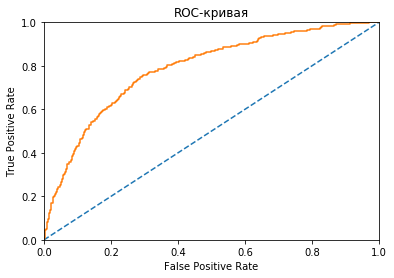

In [46]:
probabilities_valid = Log_Reg.predict_proba(features_ohe_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_ohe_valid, probabilities_one_valid) 

plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

Теперь попробуем сбалансировать классы.

In [47]:
Log_Reg = LogisticRegression(solver = 'liblinear', class_weight='balanced')
Log_Reg_score = Log_Reg.fit(features_ohe_train, target_ohe_train).score(features_ohe_valid, target_ohe_valid)
print('Точность модели:', Log_Reg_score)

Точность модели: 0.7215


Теперь точность модели хуже чем у дамми-модели.

In [48]:
Log_Reg_predict = Log_Reg.predict(features_ohe_valid)
confusion_matrix(target_ohe_valid, Log_Reg_predict)

array([[1164,  462],
       [  95,  279]])

In [49]:
metrics(target_ohe_valid, Log_Reg_predict)

Точность 0.3765182186234818
Полнота 0.7459893048128342
F1-мера 0.5004484304932735
AUC-ROC 0.7309282317422106


Значение F1-меры выросло, однако упала резко точность, теперь много ложноположительных ответов. Увеличилось значение AUC-ROC.

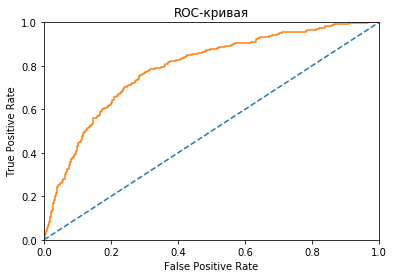

In [50]:
probabilities_valid = Log_Reg.predict_proba(features_ohe_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_ohe_valid, probabilities_one_valid) 

plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

Попробуем увеличить выборку с помощью техники upsampling.

In [51]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=42)
    
    return features_upsampled, target_upsampled

In [52]:
features_ohe_train_upsampled, target_ohe_train_upsampled = upsample(features_ohe_train, target_ohe_train, 4)

In [53]:
print(target_ohe_train_upsampled.value_counts(normalize=True))

1    0.504146
0    0.495854
Name: exited, dtype: float64


In [54]:
Log_Reg = LogisticRegression(solver = 'liblinear')
Log_Reg_score = Log_Reg.fit(features_ohe_train_upsampled, target_ohe_train_upsampled).score(features_ohe_valid, 
                                                                                            target_ohe_valid)
print('Точность модели после upsampling:', Log_Reg_score)

Точность модели после upsampling: 0.7215


Точность модели еще немного упала. Посмотрим на метрики.

In [55]:
Log_Reg_predict = Log_Reg.predict(features_ohe_valid)
confusion_matrix(target_ohe_valid, Log_Reg_predict)

array([[1159,  467],
       [  90,  284]])

In [56]:
metrics(target_ohe_valid, Log_Reg_predict)

Точность 0.3781624500665779
Полнота 0.7593582887700535
F1-мера 0.5048888888888889
AUC-ROC 0.7360752083456663


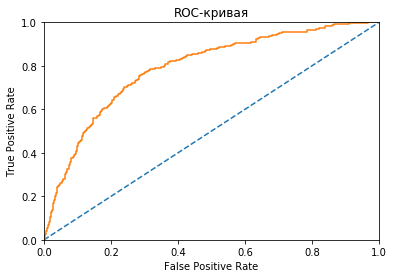

In [57]:
probabilities_valid = Log_Reg.predict_proba(features_ohe_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_ohe_valid, probabilities_one_valid) 

plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

Качество модели осталось примерно прежним, попробуем сдвинуть порог классификации.

In [58]:
for threshold in np.arange(0.4, 0.6, 0.02):
    predicted_valid = probabilities_one_valid > threshold 
    precision = precision_score(target_ohe_valid, predicted_valid)
    recall = recall_score(target_ohe_valid, predicted_valid)
    f1 = 2 * precision * recall / (precision + recall) 
    print(f'Порог = {threshold:.2f} | Точность = {precision:.3f}, Полнота = {recall:.3f}, F1-мера = {f1:.3f}')

Порог = 0.40 | Точность = 0.301, Полнота = 0.856, F1-мера = 0.446
Порог = 0.42 | Точность = 0.316, Полнота = 0.840, F1-мера = 0.459
Порог = 0.44 | Точность = 0.331, Полнота = 0.824, F1-мера = 0.472
Порог = 0.46 | Точность = 0.343, Полнота = 0.797, F1-мера = 0.479
Порог = 0.48 | Точность = 0.359, Полнота = 0.783, F1-мера = 0.492
Порог = 0.50 | Точность = 0.378, Полнота = 0.759, F1-мера = 0.505
Порог = 0.52 | Точность = 0.387, Полнота = 0.722, F1-мера = 0.504
Порог = 0.54 | Точность = 0.401, Полнота = 0.687, F1-мера = 0.506
Порог = 0.56 | Точность = 0.418, Полнота = 0.650, F1-мера = 0.508
Порог = 0.58 | Точность = 0.425, Полнота = 0.610, F1-мера = 0.501


Не удалось достигнуть увеличения метрики. Попробуем найти наилучшие параметры.

<a id='Улучшение качества модели 1'></a>

### <p style="text-align:center"> Улучшение качества модели </p>

С помощью прямого перебора попробуем подобрать оптимальные гиперпараметры для нашей модели.

In [59]:
start = timeit.default_timer()
best_model = None
best_result = 0
for С in range(1, 11, 2):
    for solver in ['newton-cg', 'sag', 'lbfgs', 'liblinear']:
        
        Log_Reg = LogisticRegression(random_state=42, C=С, solver=solver) 
        
        Log_Reg.fit(features_ohe_train_upsampled, target_ohe_train_upsampled)
        
        result = Log_Reg.score(features_ohe_valid, target_ohe_valid) 
        if result > best_result:
            best_model = Log_Reg
            best_result = result
stop = timeit.default_timer()
print("Accuracy of the best model, validation:", best_result)
print(f'Time spent: {stop - start:.2f} sec')

Accuracy of the best model, validation: 0.7215
Time spent: 8.24 sec


In [60]:
Log_Reg_predict = Log_Reg.predict(features_ohe_valid)
confusion_matrix(target_ohe_valid, Log_Reg_predict)

array([[1159,  467],
       [  90,  284]])

In [61]:
metrics(target_ohe_valid, Log_Reg_predict)

Точность 0.3781624500665779
Полнота 0.7593582887700535
F1-мера 0.5048888888888889
AUC-ROC 0.7360752083456663


К сожалению придется признать, что решить данную задачу, используя линейную регрессию, у нас не получится. Попробуем случайные леса.

## <p style="text-align:center"> Создание модели случайного леса</p>

Создадим модель случайного леса, попробуем добиться необходимой точности.

<a id='Разделение датасета на выборки, исследование баланса классов 2'></a>

### <p style="text-align:center"> Разделение датасета на выборки, исследование баланса классов </p>

In [62]:
features_ordinal = df_ordinal.drop('exited', axis=1)
target_ordinal = df_ordinal['exited']

In [63]:
features_ordinal_train, features_ordinal_test, target_ordinal_train, target_ordinal_test = train_test_split(
    features_ordinal, target_ordinal, test_size=0.4, random_state=42)
features_ordinal_test, features_ordinal_valid, target_ordinal_test, target_ordinal_valid = train_test_split(
    features_ordinal_test, target_ordinal_test, test_size=0.5, random_state=42)

Проверим разбиение.

In [64]:
print('Признаки обучающей выборки:',features_ordinal_train.shape,
      'Целевой признак обучающей выборки:', target_ordinal_train.shape, 
      'Признаки валидационной выборки:',features_ordinal_valid.shape,  
      'Целевой признак валидационной выборки:', target_ordinal_valid.shape, 
      'Признаки тестовой выборки:', features_ordinal_test.shape,
      'Целевой признак тестовой выборки:', target_ordinal_test.shape)

Признаки обучающей выборки: (6000, 10) Целевой признак обучающей выборки: (6000,) Признаки валидационной выборки: (2000, 10) Целевой признак валидационной выборки: (2000,) Признаки тестовой выборки: (2000, 10) Целевой признак тестовой выборки: (2000,)


In [65]:
target_ordinal_train.value_counts(normalize = True)

0.0    0.7955
1.0    0.2045
Name: exited, dtype: float64

In [66]:
target_ordinal_valid.value_counts(normalize = True)

0.0    0.785
1.0    0.215
Name: exited, dtype: float64

У выборок явный дисбаланс, при обучении моделей ожидаем явный перекос к одному из вариантов ответа.

<a id='Применение модели случайного леса'></a>

### <p style="text-align:center"> Применение модели случайного леса </p>

In [67]:
RF_clf = RandomForestClassifier(random_state=42)
RF_clf_score = RF_clf.fit(features_ordinal_train, target_ordinal_train).score(features_ordinal_valid, target_ordinal_valid)
print('Точность модели:', RF_clf_score)

Точность модели: 0.8565


Проверим насколько наша модель лучше дамми модели, а также посмотрим, какие у нашей модели ответы.

In [68]:
const_model = pd.Series([0]*len(target_ordinal_valid))
const_model.shape

(2000,)

In [69]:
const_model_score = accuracy_score(target_ordinal_valid, const_model)
print('Точность дамми модели:', const_model_score)

Точность дамми модели: 0.785


In [70]:
RF_clf_proportion = pd.Series(RF_clf.predict(features_ordinal_valid)).value_counts(normalize = 1)
print('Доля ответов:', RF_clf_proportion)

Доля ответов: 0.0    0.8725
1.0    0.1275
dtype: float64


Как мы видим, точность нашей модели на валидации лишь немного выше точности дамми модели, однако все равно присутствует перекос в ответах. Посмотрим на метрики для лучшего понимания проблемы.

In [71]:
RF_clf_predict = RF_clf.predict(features_ordinal_valid)
confusion_matrix(target_ordinal_valid, RF_clf_predict)

array([[1514,   56],
       [ 231,  199]])

In [72]:
metrics(target_ordinal_valid, RF_clf_predict)

Точность 0.7803921568627451
Полнота 0.4627906976744186
F1-мера 0.5810218978102191
AUC-ROC 0.7135609539327508


Видно, что у нашей модели низкое значение F1-меры, на которую в первую очередь влияет полнота. На матрице ошибок видно, что модель много ошибается, большое количество ложноотрицательных ответов. Значение AUC-ROC также невысокое. Однако следут отметить, что эта модель уже работает лучше чем логистическая регрессия.

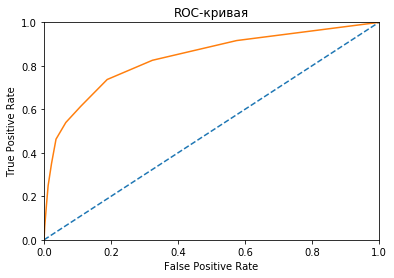

In [73]:
probabilities_valid = RF_clf.predict_proba(features_ordinal_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_ordinal_valid, probabilities_one_valid) 

plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

Теперь попробуем сбалансировать классы.

In [74]:
RF_clf = RandomForestClassifier(random_state=42, class_weight='balanced')
RF_clf_score = RF_clf.fit(features_ordinal_train, target_ordinal_train).score(features_ordinal_valid, target_ordinal_valid)
print('Точность модели:', RF_clf_score)

Точность модели: 0.8455


Точность модели практически не изменилась.

In [75]:
RF_clf_predict = RF_clf.predict(features_ordinal_valid)
confusion_matrix(target_ordinal_valid, RF_clf_predict)

array([[1519,   51],
       [ 258,  172]])

In [76]:
metrics(target_ordinal_valid, RF_clf_predict)

Точность 0.7713004484304933
Полнота 0.4
F1-мера 0.5267993874425728
AUC-ROC 0.6837579617834394


Значение F1-меры практически не изменилось.

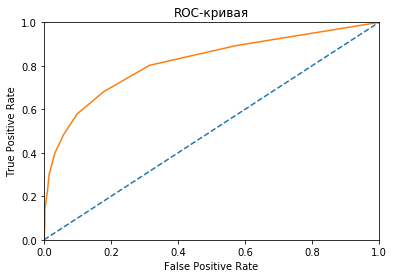

In [77]:
probabilities_valid = RF_clf.predict_proba(features_ordinal_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_ordinal_valid, probabilities_one_valid) 

plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

Попробуем увеличить выборку с помощью техники upsampling.

In [78]:
features_ordinal_train_upsampled, target_ordinal_train_upsampled = upsample(features_ordinal_train, target_ordinal_train, 4)

In [79]:
print(target_ordinal_train_upsampled.value_counts(normalize=True))

1.0    0.506972
0.0    0.493028
Name: exited, dtype: float64


In [80]:
RF_clf = RandomForestClassifier(random_state=42)
RF_clf_score = RF_clf.fit(features_ordinal_train_upsampled, target_ordinal_train_upsampled).score(features_ordinal_valid, 
                                                                                                  target_ordinal_valid)
print('Точность модели после upsampling:', RF_clf_score)

Точность модели после upsampling: 0.8395


Точность модели еще немного упала. Посмотрим на метрики.

In [81]:
RF_clf_predict = RF_clf.predict(features_ordinal_valid)
confusion_matrix(target_ordinal_valid, RF_clf_predict)

array([[1457,  113],
       [ 208,  222]])

In [82]:
metrics(target_ordinal_valid, RF_clf_predict)

Точность 0.6626865671641791
Полнота 0.5162790697674419
F1-мера 0.580392156862745
AUC-ROC 0.7221522737372241


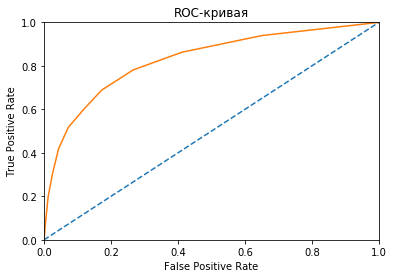

In [83]:
probabilities_valid = RF_clf.predict_proba(features_ordinal_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_ordinal_valid, probabilities_one_valid) 

plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

Качество модели увеличилось, но пока не соответствует требуемому. Попробуем сдвинуть порог классификации.

In [84]:
for threshold in np.arange(0.4, 0.6, 0.02):
    predicted_valid = probabilities_one_valid > threshold 
    precision = precision_score(target_ordinal_valid, predicted_valid)
    recall = recall_score(target_ordinal_valid, predicted_valid)
    f1 = 2 * precision * recall / (precision + recall) 
    print(f'Порог = {threshold:.2f} | Точность = {precision:.3f}, Полнота = {recall:.3f}, F1-мера = {f1:.3f}')

Порог = 0.40 | Точность = 0.581, Полнота = 0.600, F1-мера = 0.590
Порог = 0.42 | Точность = 0.581, Полнота = 0.600, F1-мера = 0.590
Порог = 0.44 | Точность = 0.581, Полнота = 0.600, F1-мера = 0.590
Порог = 0.46 | Точность = 0.581, Полнота = 0.600, F1-мера = 0.590
Порог = 0.48 | Точность = 0.581, Полнота = 0.600, F1-мера = 0.590
Порог = 0.50 | Точность = 0.663, Полнота = 0.516, F1-мера = 0.580
Порог = 0.52 | Точность = 0.663, Полнота = 0.516, F1-мера = 0.580
Порог = 0.54 | Точность = 0.663, Полнота = 0.516, F1-мера = 0.580
Порог = 0.56 | Точность = 0.663, Полнота = 0.516, F1-мера = 0.580
Порог = 0.58 | Точность = 0.663, Полнота = 0.516, F1-мера = 0.580


Попробуем подобрать параметры для увеличения качества модели.

<a id='Улучшение качества модели 2'></a>

### <p style="text-align:center"> Улучшение качества модели </p>

Прямым перебором параметров выберем лучшую модель.

In [85]:
start = timeit.default_timer()
best_model = None
best_result = 0
for est in range(10, 31, 10):
    for depth in range(1, 7):
        for leaf in range (1, 7):
            for split in range (2, 7, 2):
                
                RF_clf_ordinal = RandomForestClassifier(random_state=42, n_estimators=est, max_depth=depth, 
                                                        min_samples_leaf=leaf, min_samples_split=split, 
                                                        bootstrap=True, n_jobs=-1) 
        
                RF_clf_ordinal.fit(features_ordinal_train_upsampled, target_ordinal_train_upsampled) 
        
                result = RF_clf_ordinal.score(features_ordinal_valid, target_ordinal_valid) 
                if result > best_result:
                    best_model = RF_clf_ordinal
                    best_result = result
stop = timeit.default_timer()
print("Accuracy of the best model, validation:", best_result)
print(f'Time spent: {stop - start:.2f} sec')

Accuracy of the best model, validation: 0.791
Time spent: 41.91 sec


In [86]:
RF_clf_ordinal_predict = RF_clf_ordinal.predict(features_ordinal_valid)
confusion_matrix(target_ordinal_valid, RF_clf_ordinal_predict)

array([[1252,  318],
       [ 105,  325]])

In [87]:
metrics(target_ordinal_valid, RF_clf_ordinal_predict)

Точность 0.505443234836703
Полнота 0.7558139534883721
F1-мера 0.6057781919850884
AUC-ROC 0.7766330913938676


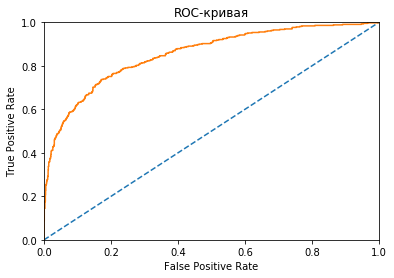

In [88]:
probabilities_valid = RF_clf_ordinal.predict_proba(features_ordinal_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_ordinal_valid, probabilities_one_valid) 

plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

Нам удалось достигнуть требуемого значения точности на валидационной выборке, модель имеет высокую полноту и среднюю точность. Сравним данную модель с константной.

In [89]:
const_model = pd.Series([0]*len(target_ordinal_valid))
const_model.shape

(2000,)

In [90]:
const_model_score = accuracy_score(target_ordinal_valid, const_model)
print('Accuracy дамми модели:', const_model_score)

Accuracy дамми модели: 0.785


In [91]:
AUC_ROC_score = roc_auc_score(target_ordinal_valid, const_model)
print('AUC-ROC дамми модели:', AUC_ROC_score)

AUC-ROC дамми модели: 0.5


Метрики качества нашей модели лучше, чем дамми модели, можно считать модель достаточно адекватной.

Дополнительно сделаем модель случайного леса обученную на выборке закодированной техникой OHE. Посмотрим на разницу в accuracy и метриках.

In [92]:
start = timeit.default_timer()
best_model = None
best_result = 0
for est in range(10, 31, 10):
    for depth in range(1, 7):
        for leaf in range (1, 7):
            for split in range (2, 7, 2):
                
                RF_clf_ohe = RandomForestClassifier(random_state=42, n_estimators=est, max_depth=depth, 
                                                    min_samples_leaf=leaf, min_samples_split=split, bootstrap=True, n_jobs=-1) 
        
                RF_clf_ohe.fit(features_ohe_train_upsampled, target_ohe_train_upsampled) 
        
                result = RF_clf_ohe.score(features_ohe_valid, target_ohe_valid) 
                if result > best_result:
                    best_model = RF_clf_ohe
                    best_result = result
stop = timeit.default_timer()
print("Accuracy of the best model, validation:", best_result)
print(f'Time spent: {stop - start:.2f} sec')

Accuracy of the best model, validation: 0.816
Time spent: 40.09 sec


In [93]:
RF_clf_ohe_predict = RF_clf_ohe.predict(features_ohe_valid)
confusion_matrix(target_ohe_valid, RF_clf_ohe_predict)

array([[1331,  295],
       [  90,  284]])

In [94]:
metrics(target_ohe_valid, RF_clf_ohe_predict)

Точность 0.4905008635578584
Полнота 0.7593582887700535
F1-мера 0.5960125918153201
AUC-ROC 0.7889657372509553


Accuracy моделей на валидации практически не отличаются. Метрики также похожи.

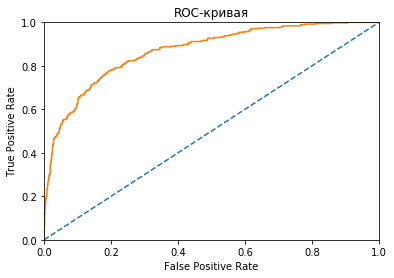

In [95]:
probabilities_valid = RF_clf_ohe.predict_proba(features_ohe_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_ohe_valid, probabilities_one_valid) 

plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

<a id='Вывод_3'></a>

### <p style="text-align:center"> Вывод </p>

##### В ходе создания моделей была проделана следующая работа:


___


1. Сначала мы разделили датасеты на выборки, в выборках выявили дисбаланс классов. Произвели эти действия и для <a href='#Разделение датасета на выборки, исследование баланса классов 1'>логистической регресси</a>, и для <a href='#Разделение датасета на выборки, исследование баланса классов 2'>случайного леса</a>.


2. Обучили модели <a href='#Применение модели случайного леса'>случайного леса</a> и <a href='#Применение логистической регрессии'>логистической регресии</a>, в обоих случаях модели имели явный перекос в выдаваемых ими ответах.


3. Устранили дисбаланс классов сначала гиперпараметром class_weight, затем с помощью upsampling. В обоих случаях характеристики моделей улучшались, но недостаточно. Дополнительно проверяли пороги классификации.


4. На шаге по улучшению моделей выяснилось, что с помощью <a href='#Улучшение качества модели 1'>логистической регрессии</a> не получится добиться желаемой точности, остался только <a href='#Улучшение качества модели 2'>лес</a>.


5. Улучшили модель случайного леса путем перебора параметров, дополнительно сделали модель случайного леса обученную на выборке закодированной техникой OHE. Обе модели хорошо показывают себя на валидации, удовлетворяют условиям поставленной задачи. Посмотрим на разницу на тесте.


___



Таким образом была выполнена работа по обучению моделей, переходим к тестированию.

 ## Часть 4. Тестирование моделей

<a id='Проведение тестов'></a>

### <p style="text-align:center"> Проведение тестов </p>

Сначала тестируем модель обученную на выборке закодированной с помощью OrdinalEncoder.

In [96]:
final_RF_clf_ordinal = RF_clf_ordinal.predict(features_ordinal_test)
metrics(target_ordinal_test, final_RF_clf_ordinal)

Точность 0.4557595993322204
Полнота 0.718421052631579
F1-мера 0.557711950970378
AUC-ROC 0.7585932423651721


In [97]:
print(f'Accuracy RandomForest Ordinal {RF_clf_ordinal.score(features_ordinal_test, target_ordinal_test)}')

Accuracy RandomForest Ordinal 0.7835


F1-мера на тестовой выборке у этой модели не соответствует требованиям.

Теперь тестируем модель обученную на выборке закодированной с помощью OHE.

In [98]:
final_RF_clf_ohe = RF_clf_ohe.predict(features_ohe_test)
metrics(target_ohe_test, final_RF_clf_ohe)

Точность 0.5188216039279869
Полнота 0.70917225950783
F1-мера 0.5992438563327033
AUC-ROC 0.7599306242806376


In [99]:
print(f'Accuracy RandomForest OHE {RF_clf_ohe.score(features_ohe_test, target_ohe_test)}')

Accuracy RandomForest OHE 0.788


Данная модель соответствует требованиям задания.

<a id='Вывод_4'></a>

### <p style="text-align:center"> Вывод </p>

##### Выяснили следующее:


___


1. Провели тестирование моделей.


2. Неожиданно отбросили одну из моделей.


___



Таким образом была работа по тестированию моделей.

 ## Часть 5. Общий вывод

<a id='Вывод_5'></a>

##### Таким образом, на основе предоставленного датасета была выполнена работа по обучению моделей, подбору параметров и контролю метрик.


___


1. В первую очередь мы изучили общую информацию о предоставленных данных.


2. Затем произвели предобработку данных по выявленным дефектам датасета.


3. После этого занялись созданием моделей, рассмотрели как линейную модель, так и случайный лес.


4. Провели тестирование моделей, выявили победителя.



___



Финальная модель достигла заданой метрики и показывает адекватные результаты. Модель характеризуется высоким показателем полноты и средним показателем точности. С точки зрения бизнеса полученная модель поможет маркетологам лучше определять килентов, которые могут уйти в ближайшее время. Важно, что модель покрывает большое количество клиентов, в данном случае это важнее, чем точность.